In [1]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(rf'D:\DLFS\Unet\hu_results.csv')

In [12]:
df_sorted = df.sort_values(by=['iou'], ascending=False)
top_combined = df_sorted.head(5)  
print("Hàng kết quả cao nhất:")
print(top_combined)


Hàng kết quả cao nhất:
     hu_min  hu_max       iou      dice       voe       rvd
120      35      95  0.543740  0.686851  0.456260  0.332112
18        0      10  0.539892  0.670870  0.460108  0.146479
22        5      90  0.536963  0.669393  0.463037  0.388447
119      35     100  0.531918  0.677550  0.468082  0.571216
107      30      90  0.528390  0.671943  0.471610  0.592334


### liver and tumor

In [23]:
df = pd.DataFrame({
    'min_liver': [],
    'max_liver': [],
    'min_tumor': [],
    'max_tumor': []
})

In [24]:
for i in range(28):
    root = rf"D:\DLFS\Unet\LiTS17\Training_Batch1\media\nas\01_Datasets\CT\LITS\Training Batch 1\segmentation-{i}.nii"
    image = sitk.ReadImage(root)
    image = sitk.GetArrayFromImage(image)

    C, H, W = image.shape
    channels_with_one = []
    channels_with_two = []

    for c in range(C):
        if np.any(image[c] == 1):
            channels_with_one.append(c)
        if np.any(image[c] == 2):
            channels_with_two.append(c)
        if channels_with_one:
            min_channel_liver = min(channels_with_one) / C
            max_channel_liver = max(channels_with_one) / C
        else:
            min_channel_liver = None
            max_channel_liver = None

        if channels_with_two:
            min_channel_tumor = min(channels_with_two) / C
            max_channel_tumor = max(channels_with_two) / C
        else:
            min_channel_tumor = None
            max_channel_tumor = None

    df.loc[len(df)] = [min_channel_liver, max_channel_liver, min_channel_tumor, max_channel_tumor]

In [25]:
for i in range(28, 131):
    root = rf"D:\DLFS\Unet\LiTS17\Training_Batch2\media\nas\01_Datasets\CT\LITS\Training Batch 2\segmentation-{i}.nii"
    image = sitk.ReadImage(root)
    image = sitk.GetArrayFromImage(image)

    C, H, W = image.shape
    channels_with_one = []
    channels_with_two = []

    for c in range(C):
        if np.any(image[c] == 1):
            channels_with_one.append(c)
        if np.any(image[c] == 2):
            channels_with_two.append(c)
        if channels_with_one:
            min_channel_liver = min(channels_with_one) / C
            max_channel_liver = max(channels_with_one) / C
        else:
            min_channel_liver = None
            max_channel_liver = None

        if channels_with_two:
            min_channel_tumor = min(channels_with_two) / C
            max_channel_tumor = max(channels_with_two) / C
        else:
            min_channel_tumor = None
            max_channel_tumor = None

    df.loc[len(df)] = [min_channel_liver, max_channel_liver, min_channel_tumor, max_channel_tumor]

In [29]:
df.describe().round(2)

,min_liver,max_liver,min_tumor,max_tumor
count,131.00,131.00,118.00,118.00
mean,0.45,0.83,0.58,0.75
std,0.15,0.14,0.17,0.15
min,0.01,0.55,0.03,0.32
25%,0.38,0.68,0.47,0.64
50%,0.46,0.92,0.58,0.78
75%,0.57,0.95,0.70,0.90
max,0.67,1.00,0.91,0.97


### HU


In [1]:
import SimpleITK as sitk
import numpy as np
import os

base_path = r"D:\DLFS\Unet\LiTS17\Training_Batch2\media\nas\01_Datasets\CT\LITS\Training Batch 2"

hu_values = []

for i in range(28, 131):
    image_root = os.path.join(base_path, f"volume-{i}.nii")
    mask_root = os.path.join(base_path, f"segmentation-{i}.nii")
    
    image = sitk.ReadImage(image_root)
    mask = sitk.ReadImage(mask_root)
    
    image_array = sitk.GetArrayFromImage(image)
    mask_array = sitk.GetArrayFromImage(mask)
       
    tumor_mask = (mask_array == 2)
    if not np.any(tumor_mask):
        print(f"No tumor found in segmentation-{i}.nii")
        continue
    
    tumor_hu = image_array[tumor_mask]
    hu_values.extend(tumor_hu.flatten())
    
if len(hu_values) == 0:
    raise ValueError("No tumor HU values found in the training set.")

hu_values = np.array(hu_values)

lower_bound = np.percentile(hu_values, 0.5)
upper_bound = np.percentile(hu_values, 99.5)

# In kết quả
print(f"Determined HU range: [{lower_bound}, {upper_bound}]")

No tumor found in segmentation-32.nii
No tumor found in segmentation-34.nii
No tumor found in segmentation-38.nii
No tumor found in segmentation-41.nii
No tumor found in segmentation-47.nii
No tumor found in segmentation-87.nii
No tumor found in segmentation-89.nii
No tumor found in segmentation-91.nii
No tumor found in segmentation-105.nii
No tumor found in segmentation-106.nii
No tumor found in segmentation-114.nii
No tumor found in segmentation-115.nii
No tumor found in segmentation-119.nii
Determined HU range: [-45.0, 167.0]


In [ ]:
import SimpleITK as sitk

input_path = r"D:\DLFS\Unet\LiTS17\Training_Batch1\media\nas\01_Datasets\CT\LITS\Training Batch 1\volume-20.nii"

image = sitk.ReadImage(input_path)

clamp_filter = sitk.ClampImageFilter()
clamp_filter.SetLowerBound(-45)  
clamp_filter.SetUpperBound(167)

clamped_image = clamp_filter.Execute(image)

sitk.WriteImage(clamped_image, 'HU_processed.nii')

clamped_array = sitk.GetArrayFromImage(clamped_image)
print(f"Min HU: {clamped_array.min()}, Max HU: {clamped_array.max()}")

Min HU: -45.0, Max HU: 167.0


### display

(75, 512, 512)
(75, 512, 512)


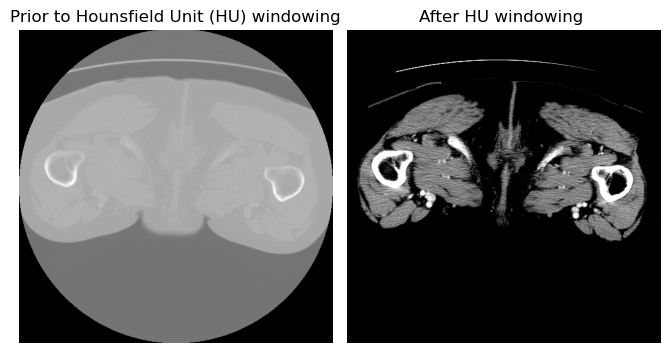

In [49]:
input_path = r"D:\DLFS\Unet\LiTS17\Training_Batch1\media\nas\01_Datasets\CT\LITS\Training Batch 1\volume-0.nii"
image = sitk.ReadImage(input_path)

clamp_filter = sitk.ClampImageFilter()
clamp_filter.SetLowerBound(-45)  
clamp_filter.SetUpperBound(167)

clamped_image = clamp_filter.Execute(image)

image_array = sitk.GetArrayFromImage(image) 
clamped_image_array = sitk.GetArrayFromImage(clamped_image)  

print(image_array.shape)
print(clamped_image_array.shape)

plt.figure(figsize=(10, 5))

# Slice 0
plt.subplot(1, 3, 1)
plt.imshow(image_array[0], cmap='gray')
plt.title("Prior to Hounsfield Unit (HU) windowing")
plt.axis("off")

# Slice 1
plt.subplot(1, 3, 2)
plt.imshow(clamped_image_array[0], cmap='gray')
plt.title("After HU windowing ")
plt.axis("off")

# # Slice 2
# plt.subplot(1, 3, 3)
# plt.imshow(test_ct[2], cmap='gray')
# plt.title("Slice 2")
# plt.axis("off")

plt.tight_layout()
plt.show()


(574, 512, 512)
(574, 512, 512)


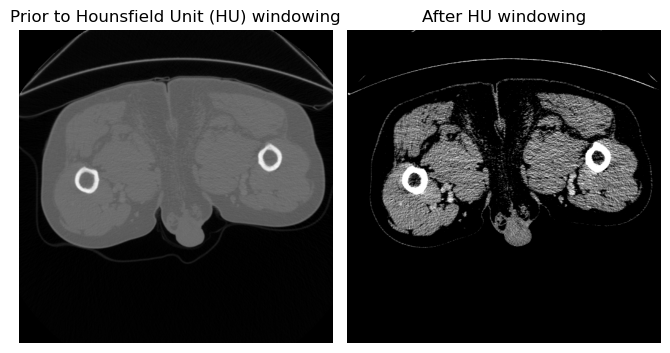

In [50]:
input_path = r"D:\DLFS\Unet\LiTS17\Training_Batch1\media\nas\01_Datasets\CT\LITS\Training Batch 1\volume-20.nii"
image = sitk.ReadImage(input_path)

clamp_filter = sitk.ClampImageFilter()
clamp_filter.SetLowerBound(-45)  
clamp_filter.SetUpperBound(167)

clamped_image = clamp_filter.Execute(image)

image_array = sitk.GetArrayFromImage(image) 
clamped_image_array = sitk.GetArrayFromImage(clamped_image)  

print(image_array.shape)
print(clamped_image_array.shape)

plt.figure(figsize=(10, 5))

# Slice 0
plt.subplot(1, 3, 1)
plt.imshow(image_array[0], cmap='gray')
plt.title("Prior to Hounsfield Unit (HU) windowing")
plt.axis("off")

# Slice 1
plt.subplot(1, 3, 2)
plt.imshow(clamped_image_array[0], cmap='gray')
plt.title("After HU windowing")
plt.axis("off")

# # Slice 2
# plt.subplot(1, 3, 3)
# plt.imshow(test_ct[2], cmap='gray')
# plt.title("Slice 2")
# plt.axis("off")

plt.tight_layout()
plt.show()

In [2]:
slice = 0
for i in range(28):
    root = rf"D:\DLFS\Unet\LiTS17\Training_Batch1\media\nas\01_Datasets\CT\LITS\Training Batch 1\segmentation-{i}.nii"
    image = sitk.ReadImage(root)
    image = sitk.GetArrayFromImage(image)
    slice += image.shape[0]
for i in range(28, 131):
    root = rf"D:\DLFS\Unet\LiTS17\Training_Batch2\media\nas\01_Datasets\CT\LITS\Training Batch 2\segmentation-{i}.nii"
    image = sitk.ReadImage(root)
    image = sitk.GetArrayFromImage(image)
    slice += image.shape[0]

In [3]:
slice

58638